<a href="https://colab.research.google.com/github/VanshikaVb/Codsoft/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("creditcard.csv")


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
13949,24754,1.252924,-0.182189,-0.802716,-0.210981,1.916713,3.643624,-0.778711,0.818295,1.706962,...,-0.497088,-1.211285,0.043809,0.964159,0.442030,0.261483,-0.051402,0.005112,23.74,0.0
13950,24756,-0.346979,-2.103284,-0.685061,1.961605,-0.401125,0.473632,1.133816,-0.256528,0.893409,...,0.359662,-0.316275,-0.864259,-0.279881,0.491802,-0.353996,-0.149931,0.129795,794.20,0.0
13951,24759,-6.053652,-5.988723,0.810413,-0.011811,1.308135,-0.590803,-0.725838,-0.234840,1.624646,...,-0.771970,1.474668,3.176363,-0.302410,0.052529,-0.373871,-0.700463,2.508443,60.00,0.0
13952,24759,1.169121,-1.284945,0.032717,-0.681670,0.660598,4.412578,-1.913115,1.076592,1.501230,...,-0.557596,-0.882435,-0.041523,0.975445,0.297229,0.550515,0.015029,0.032067,90.00,0.0
13953,24759,-6.917152,5.854171,-1.652458,-1.488884,-0.833891,-0.344418,0.393789,0.379968,6.133597,...,-1.404681,-1.124694,0.174333,-0.528234,0.990685,-0.035875,1.071374,-0.168831,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13954 entries, 0 to 13953
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    13954 non-null  int64  
 1   V1      13954 non-null  float64
 2   V2      13954 non-null  float64
 3   V3      13954 non-null  float64
 4   V4      13954 non-null  float64
 5   V5      13954 non-null  float64
 6   V6      13954 non-null  float64
 7   V7      13954 non-null  float64
 8   V8      13954 non-null  float64
 9   V9      13954 non-null  float64
 10  V10     13954 non-null  float64
 11  V11     13954 non-null  float64
 12  V12     13954 non-null  float64
 13  V13     13954 non-null  float64
 14  V14     13954 non-null  float64
 15  V15     13954 non-null  float64
 16  V16     13954 non-null  float64
 17  V17     13954 non-null  float64
 18  V18     13954 non-null  float64
 19  V19     13954 non-null  float64
 20  V20     13954 non-null  float64
 21  V21     13954 non-null  float64
 22

In [ ]:
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13949,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13950,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13951,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13952,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df = df.drop(13953)

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df['Class'].value_counts()

0.0    13896
1.0       56
Name: Class, dtype: int64

In [ ]:
legit=df[df.Class == 0]
fraud =df[df.Class == 1]

<Axes: xlabel='Class', ylabel='count'>

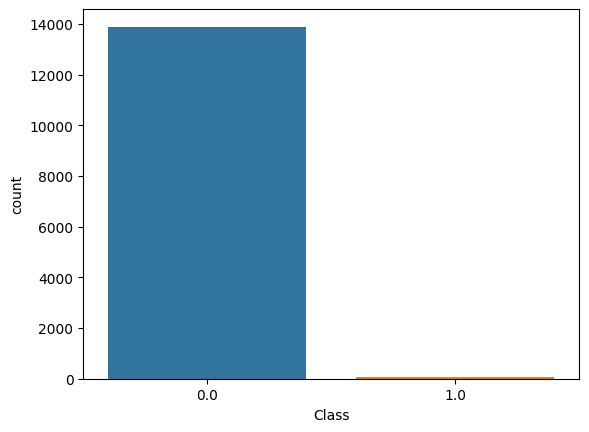

In [ ]:
sns.countplot(x='Class', data= df)

In [ ]:
df.Amount.describe()

count    13952.000000
mean        63.870429
std        177.887737
min          0.000000
25%          5.490000
50%         15.685000
75%         52.082500
max       7712.430000
Name: Amount, dtype: float64

In [ ]:
legit.Amount.describe()

count    13896.000000
mean        63.761841
std        177.165165
min          0.000000
25%          5.765000
50%         15.895000
75%         52.325000
max       7712.430000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count      56.000000
mean       90.815893
std       310.308450
min         0.000000
25%         1.000000
50%         1.000000
75%         1.025000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,10111.730714,-0.217070,0.266281,0.887134,0.276735,-0.107410,0.136716,-0.131501,-0.020390,1.005421,...,0.020715,-0.068687,-0.158248,-0.034885,0.013021,0.118008,0.034277,0.009561,0.002316,63.761841
1.0,12262.107143,-4.727948,4.660436,-9.328536,6.783464,-2.890388,-2.030360,-6.578337,1.028374,-2.981468,...,0.453283,0.116896,0.048132,-0.225526,-0.452514,-0.124184,0.333325,0.793484,-0.046177,90.815893


In [ ]:
legit_sample = legit.sample(n=56)

In [ ]:
new_df = pd.concat([legit_sample,fraud], axis = 0)

In [ ]:
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3287,2833,-1.615955,-1.163973,2.403048,-1.456981,-0.739883,-0.337514,-0.434066,0.185155,-0.855515,...,0.431869,1.039472,-0.211846,0.368811,0.472395,-0.154566,-0.063904,0.168482,151.00,0.0
1181,919,-0.222350,1.256333,0.972661,2.312995,0.756371,-0.782664,1.015879,-0.208845,-1.602785,...,0.150769,0.383065,-0.074840,0.392430,-0.476923,0.014385,0.149302,0.187365,4.91,0.0
12602,22076,1.090666,0.336109,-0.072621,1.384967,0.060575,-1.096974,0.623667,-0.489797,0.919411,...,-0.082523,-0.131621,-0.226813,0.358635,0.810954,-0.346882,-0.050001,0.022698,99.99,0.0
4085,3736,1.193614,-0.516301,0.401358,0.091652,-0.550901,0.247889,-0.569122,0.021030,0.282193,...,-0.624833,-1.088396,0.043054,-0.373327,0.222465,0.249774,-0.028711,0.003255,59.90,0.0
13894,24659,-0.632264,-0.350130,2.491137,-2.337413,-0.858949,-0.226690,-0.360311,-0.149494,-0.704331,...,-0.216418,0.197165,-0.217992,-0.004750,0.302543,-0.207374,0.125373,-0.100621,32.40,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11880,20451,-15.819179,8.775997,-22.804686,11.864868,-9.092361,-2.386893,-16.560368,0.948349,-6.310658,...,-2.350634,1.036362,1.136051,-1.043414,-0.108923,0.657437,2.136424,-1.411945,1.00,1.0
12070,20931,-16.367923,9.223692,-23.270631,11.844777,-9.462037,-2.450444,-16.925152,1.384208,-6.287736,...,-2.343674,1.004602,1.188212,-1.047184,-0.035573,0.664900,2.122796,-1.416741,1.00,1.0
12108,21046,-16.917468,9.669900,-23.736443,11.824990,-9.830548,-2.514829,-17.290657,1.820408,-6.264903,...,-2.336111,0.972755,1.241866,-1.051086,0.038009,0.672317,2.108471,-1.421243,1.00,1.0
12261,21419,-17.467710,10.114816,-24.202142,11.805469,-10.198046,-2.579938,-17.656788,2.256902,-6.242149,...,-2.328024,0.940830,1.296817,-1.055104,0.111792,0.679695,2.093541,-1.425491,1.00,1.0


In [ ]:
X = new_df.drop(columns='Class', axis=1)

In [ ]:
y = new_df['Class']

In [ ]:
print(X)

        Time         V1         V2         V3         V4         V5        V6  \
3287    2833  -1.615955  -1.163973   2.403048  -1.456981  -0.739883 -0.337514   
1181     919  -0.222350   1.256333   0.972661   2.312995   0.756371 -0.782664   
12602  22076   1.090666   0.336109  -0.072621   1.384967   0.060575 -1.096974   
4085    3736   1.193614  -0.516301   0.401358   0.091652  -0.550901  0.247889   
13894  24659  -0.632264  -0.350130   2.491137  -2.337413  -0.858949 -0.226690   
...      ...        ...        ...        ...        ...        ...       ...   
11880  20451 -15.819179   8.775997 -22.804686  11.864868  -9.092361 -2.386893   
12070  20931 -16.367923   9.223692 -23.270631  11.844777  -9.462037 -2.450444   
12108  21046 -16.917468   9.669900 -23.736443  11.824990  -9.830548 -2.514829   
12261  21419 -17.467710  10.114816 -24.202142  11.805469 -10.198046 -2.579938   
12369  21662 -18.018561  10.558600 -24.667741  11.786180 -10.564657 -2.645681   

              V7        V8 

In [ ]:
print(y)

3287     0.0
1181     0.0
12602    0.0
4085     0.0
13894    0.0
        ... 
11880    1.0
12070    1.0
12108    1.0
12261    1.0
12369    1.0
Name: Class, Length: 112, dtype: float64


In [ ]:
#splitting the data nto training data and testing data.
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y , random_state=2)
print(X.shape, X_train.shape , X_test.shape)

(112, 30) (89, 30) (23, 30)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train ,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
X_Train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_Train_prediction , y_train)

In [ ]:
print('Accuracy on training data :' , training_data_accuracy)

Accuracy on training data : 0.9887640449438202


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction , y_test)


In [ ]:
print('Accuracy on testing data :' , test_data_accuracy)

Accuracy on testing data : 0.9130434782608695
